# Graph

## algorithm (adjacent list of directed weighted graph)

In [1]:
class Vertex:
    def __init__(self, node):
        self._id = node
        self._adjacent = {}  # dict: key = neighbor, value = weight

    def __str__(self):
        return 'Adjacent of ' + str(self._id) + ' : ' + str([adj._id for adj in self._adjacent])

    def get_id(self):
        return self._id
    
    def set_neighbor_weight(self, neighbor, weight=0):
        self._adjacent[neighbor] = weight

    def get_weight(self, neighbor):
        return self._adjacent[neighbor]
    
    def get_neighbors(self):
        return self._adjacent.keys()
    
    def get_degree_centrality(self):
        return len(self._adjacent)
    
    def get_weighted_degree_centrality(self):
        return sum(self._adjacent.values())

class Graph:
    def __init__(self):
        self._vertDict = {}   # key = node id, value = Vertex

    def __iter__(self):
        return iter(self._vertDict.values())

    def add_vertex(self, node):
        if node in self._vertDict:
            return self._vertDict[node]
        else:
            vertNew = Vertex(node)
            self._vertDict[node] = vertNew
            return vertNew

    def get_vertex(self, node):
        return self._vertDict[node] if node in self._vertDict else None

    def get_vertices(self):
        return self._vertDict.keys()
    
    def get_count_vertices(self):
        return len(self._vertDict)
    
    def get_count_edges(self):
        count = 0
        for vert in self._vertDict.values():
            count += vert.get_degree_centrality()
        return count
    
    def add_edge(self, frm, to, w=0):
        self.add_vertex(frm)
        self.add_vertex(to)
        self._vertDict[frm].set_neighbor_weight(self._vertDict[to], w)


## run

In [9]:
import csv
GoT = Graph()
with open('stormofswords.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for line in reader:
        GoT.add_edge(line[0],line[1],int(line[2]))
print('Num of vertices = {0:d} '.format(GoT.get_count_vertices()))
print('Num of edges = {0:d} '.format(GoT.get_count_edges()))

Num of vertices = 107 
Num of edges = 352 


In [10]:
for v in GoT:
    for w in v.get_neighbors():
        v_id = v.get_id()
        w_id = w.get_id()
        print('( {0:12s} , {1:12s}, {2:4d} )'.format( v_id, w_id, v.get_weight(w) ))

( Aemon        , Grenn       ,    5 )
( Aemon        , Samwell     ,   31 )
( Samwell      , Bowen       ,    6 )
( Samwell      , Craster     ,   34 )
( Samwell      , Eddison     ,   12 )
( Samwell      , Gilly       ,   36 )
( Samwell      , Grenn       ,   43 )
( Samwell      , Janos       ,    6 )
( Samwell      , Mance       ,   10 )
( Samwell      , Qhorin      ,    5 )
( Aerys        , Jaime       ,   18 )
( Aerys        , Robert      ,    6 )
( Aerys        , Tyrion      ,    5 )
( Aerys        , Tywin       ,    8 )
( Jaime        , Balon       ,    6 )
( Jaime        , Barristan   ,    4 )
( Jaime        , Brienne     ,   88 )
( Jaime        , Edmure      ,    5 )
( Jaime        , Elia        ,    4 )
( Jaime        , Gregor      ,    6 )
( Jaime        , Joffrey     ,   15 )
( Jaime        , Loras       ,   16 )
( Jaime        , Meryn       ,   11 )
( Jaime        , Qyburn      ,   11 )
( Jaime        , Renly       ,    7 )
( Jaime        , Robert      ,   17 )
( Jaime     

In [11]:
for v in GoT:
    print(GoT._vertDict[v.get_id()])

Adjacent of Aemon : ['Grenn', 'Samwell']
Adjacent of Grenn : []
Adjacent of Samwell : ['Bowen', 'Craster', 'Eddison', 'Gilly', 'Grenn', 'Janos', 'Mance', 'Qhorin']
Adjacent of Aerys : ['Jaime', 'Robert', 'Tyrion', 'Tywin']
Adjacent of Jaime : ['Balon', 'Barristan', 'Brienne', 'Edmure', 'Elia', 'Gregor', 'Joffrey', 'Loras', 'Meryn', 'Qyburn', 'Renly', 'Robert', 'Stannis', 'Tommen', 'Tyrion']
Adjacent of Robert : ['Aemon', 'Barristan', 'Renly', 'Stannis', 'Thoros']
Adjacent of Tyrion : ['Balon', 'Bronn', 'Chataya', 'Doran', 'Elia', 'Ellaria', 'Gregor', 'Ilyn', 'Janos', 'Kevan', 'Loras', 'Mace', 'Margaery', 'Meryn', 'Oberyn', 'Petyr', 'Podrick', 'Pycelle', 'Renly', 'Robert', 'Sandor', 'Shae', 'Stannis', 'Varys']
Adjacent of Tywin : ['Balon', 'Brynden', 'Cersei', 'Gregor', 'Jaime', 'Joffrey', 'Kevan', 'Mace', 'Oberyn', 'Petyr', 'Podrick', 'Pycelle', 'Robert', 'Stannis', 'Tommen', 'Tyrion', 'Val', 'Varys', 'Walder']
Adjacent of Alliser : ['Mance']
Adjacent of Mance : ['Craster', 'Dalla', 'G

In [13]:
# Degree Centrality
degree_centrality = {}
weighted_degree_centrality = {}
for v in GoT:
    degree_centrality[v.get_id()] = v.get_degree_centrality()
    weighted_degree_centrality[v.get_id()] = v.get_weighted_degree_centrality()
print('top 5 of degree centrality: ')
print(sorted(degree_centrality.items(), key=lambda d: d[1], reverse=True)[:5])
print('top 5 of weighted degree centrality: ')
print(sorted(weighted_degree_centrality.items(), key=lambda d: d[1], reverse=True)[:5])

top 5 of degree centrality: 
[('Tyrion', 24), ('Robb', 23), ('Sansa', 23), ('Jon', 21), ('Tywin', 19)]
top 5 of weighted degree centrality: 
[('Jon', 397), ('Sansa', 354), ('Robb', 286), ('Bran', 283), ('Tyrion', 264)]


In [70]:
!pip install networkx
!pip install matplotlib
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

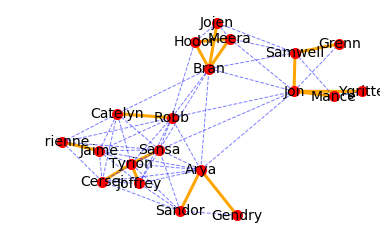

['Arya', 'Bran', 'Cersei', 'Gendry', 'Jaime', 'Joffrey', 'Jon', 'Sandor', 'Tyrion', 'Hodor', 'Jojen', 'Meera', 'Samwell', 'Catelyn', 'Brienne', 'Robb', 'Sansa', 'Grenn', 'Mance', 'Ygritte']


In [99]:
nx_GoT = nx.Graph()

keepList = ['Arya', 'Gendry', 'Sandor', 'Bran', 'Hodor', 'Jojen', \
    'Meera', 'Catelyn', 'Robb', 'Cersei', 'Tyrion', 'Jaime', \
    'Brienne', 'Joffrey', 'Jon', 'Mance', 'Samwell', 'Ygritte', 'Grenn', 'Sansa']

with open('stormofswords.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for line in reader:
        if line[0] in keepList and line[1] in keepList:
            nx_GoT.add_edge(line[0],line[1], weight=int(line[2]))

elarge = [(u, v) for (u, v, d) in nx_GoT.edges(data=True) if d['weight'] > 40]
esmall = [(u, v) for (u, v, d) in nx_GoT.edges(data=True) if d['weight'] <= 40]

pos = nx.spring_layout(nx_GoT)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(nx_GoT, pos, node_size=100)

# edges
nx.draw_networkx_edges(nx_GoT, pos, edgelist=elarge,
                       width=3, edge_color='orange')
nx.draw_networkx_edges(nx_GoT, pos, edgelist=esmall, 
                       width=1, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(nx_GoT, pos, font_size=14, font_family='sans-serif')

plt.axis('off')
plt.show()

print(nx_GoT.nodes())